<font color = green >

## Home Task: Implement K-means algorithm

</font>


<font color = green >

###  Data 

</font>



array([[ 0.87033369, -1.12915356],
       [-0.27565612,  1.07888341],
       [ 0.68590571,  1.4901946 ],
       [ 1.16581799,  0.87715301],
       [-1.0607126 ,  0.6950888 ],
       [-1.93374202,  0.8081594 ],
       [ 0.8312521 ,  3.00748115],
       [-1.32529436,  0.56508847],
       [-0.67432656,  0.51681344],
       [ 0.39265381,  2.19473735],
       [ 0.11469877,  1.11738748],
       [ 1.0928623 ,  0.14006749],
       [ 0.83231614,  2.46075432],
       [-0.01360694,  1.12166991],
       [-1.93163526,  0.21254111],
       [-2.283329  ,  0.66328673],
       [ 0.01506017,  1.60714016],
       [ 1.2175747 ,  0.25478768],
       [-2.08810495,  0.426327  ],
       [ 1.17086528,  1.51398058],
       [-1.88066313,  0.49498639],
       [ 1.03726908,  0.45038823],
       [ 0.13281609,  1.04514885],
       [ 0.26335749,  0.53369949],
       [ 1.09534648,  0.48617797],
       [ 0.76542012, -0.0682718 ],
       [-0.4709388 ,  0.55511208],
       [ 1.19985562, -1.41700267],
       [-1.64733219,

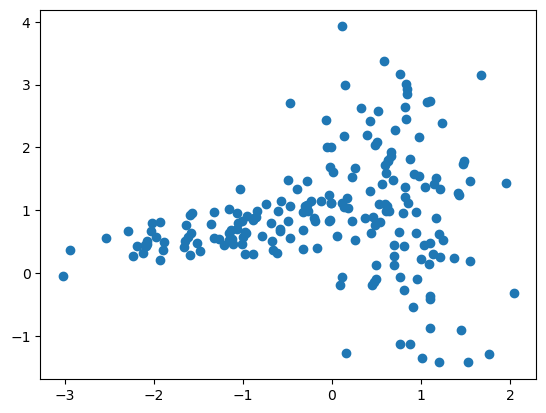

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import pandas as pd
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

%matplotlib inline

np.random.seed(420)

data,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)
x = data[:,0]
y = data[:,1]

plt.figure()
plt.scatter(x, y)

data

### Для простоти я переведу усі данні в dataframe

In [22]:
df = pd.DataFrame(data, columns=['feature1', 'feature2'])
df

,feature1,feature2
0,0.870334,-1.129154
1,-0.275656,1.078883
2,0.685906,1.490195
3,1.165818,0.877153
4,-1.060713,0.695089
...,...,...
195,0.658270,1.863549
196,0.428935,2.415793
197,0.159017,-1.273006
198,-0.321872,0.378906


In [23]:
def k_means_clustering(data, k, max_iterations=100):
  
  # ініціалізація K-кількості центроїдів
  centroids = data.sample(k)

  for i in range(max_iterations):
    # для кожної точки в датафреймі присвоюю свій кластер
    clustered_data = assign_to_nearest_centroid(data, centroids)

    # шукаю середнє арифметичне значення кластеру точок для нового центроїду
    centroids = clustered_data.groupby('cluster').mean()

  return clustered_data, centroids


def assign_to_nearest_centroid(data, centroids):
  clusters = []
  
  for point in np.array(data.iloc[:, :2]):
    distances = []
    for centroid in np.array(centroids):
      distances.append(np.sum((point - centroid) ** 2))
      
    # Індекс центроїда з мінімальною дистанцією до точки яку розглядаю
    nearest_centroid_index = np.argmin(distances)
    
    clusters.append(nearest_centroid_index)
  
  data['cluster'] = clusters
  return data

### Моя імплементація

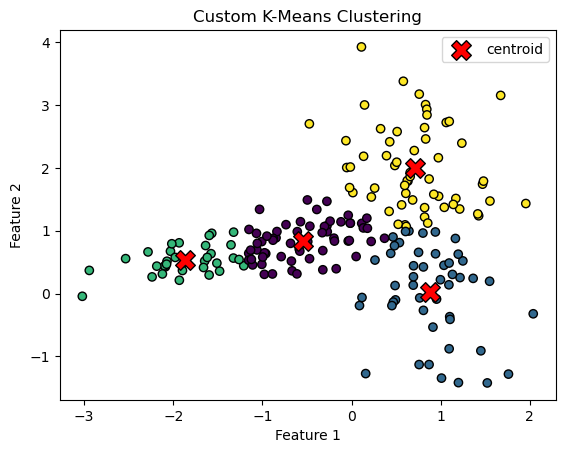

In [24]:
clustered_data, cluster_centres = k_means_clustering(df, 4)

clustered_data

plt.figure()
plt.scatter(clustered_data['feature1'], clustered_data['feature2'], c=clustered_data['cluster'], edgecolors='k')
plt.scatter(cluster_centres['feature1'], cluster_centres['feature2'], edgecolors='k', s=200, c='red', marker='X', label='centroid')
plt.title('Custom K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Для перевірки виконав кластеризацію з допомогою бібліотеки sklearn. Як можна помітити різниця невелика, отже моя імплементація працює вірно.

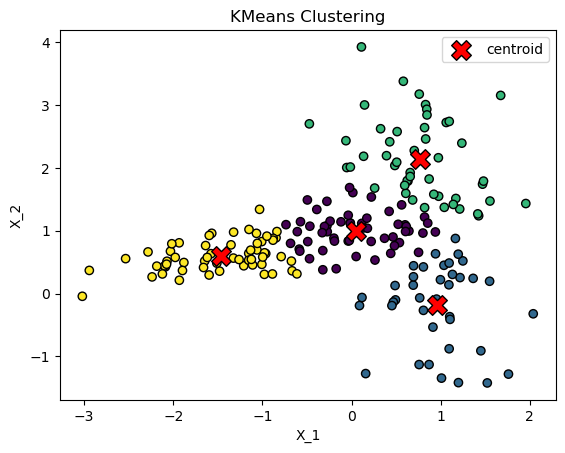

In [25]:
km = KMeans(n_clusters=4, max_iter=100)
copy_data = data
y_predicted =  km.fit_predict(copy_data)

plt.figure()
plt.scatter(copy_data[:, 0], copy_data[:, 1], c=y_predicted, edgecolors='k')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], edgecolors='k', s=200, c='red', marker='X', label='centroid')
plt.title('KMeans Clustering')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.legend()
plt.show()